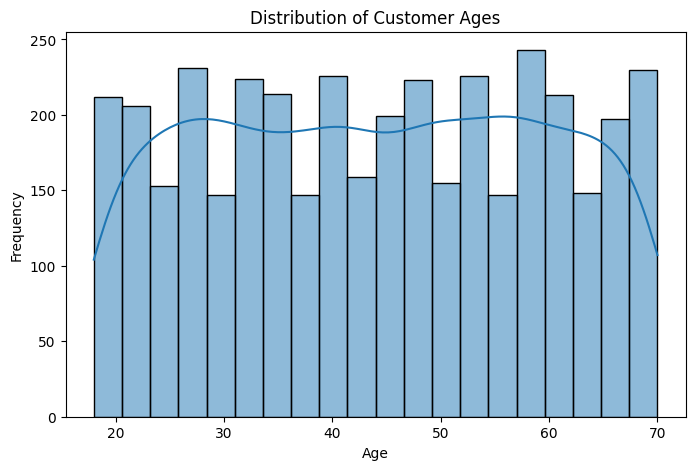

In [21]:
# What is the overall distribution of customer ages in the dataset?
# Solution
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("shopping_trends_updated.csv")

# Plot the age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Distribution of Customer Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


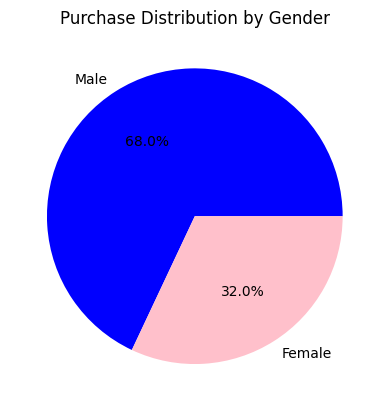

In [27]:
# How does the average purchase amount vary across different product categories?
# Solution
# Group by product category and calculate average purchase amount
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'pink'])
plt.ylabel('')
plt.title('Purchase Distribution by Gender')
plt.show()



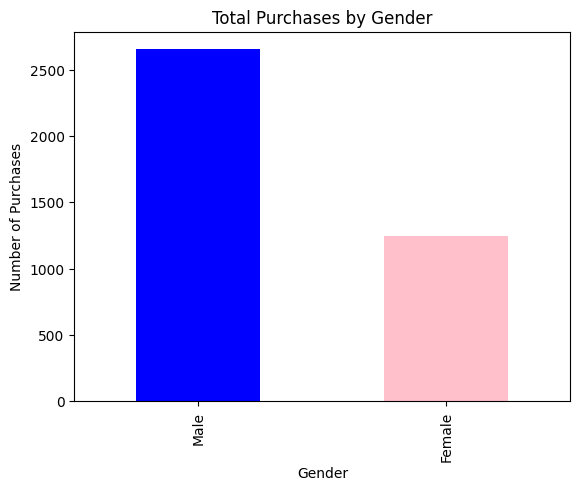

In [26]:
# Which gender has the highest number of purchases
# Solution
df['Gender'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Number of Purchases')
plt.title('Total Purchases by Gender')
plt.show()


In [28]:
# What are the most commonly purchased items in each category?
# Solution
pd.pivot_table(df, index='Category', columns='Item Purchased', values='Customer ID', aggfunc='count', fill_value=0)


Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Category,,,,,,,,,,,,,,,,,,,,,
Accessories,143,161,0,0,0,0,140,153,154,0,...,157,0,0,0,0,0,0,161,0,0
Clothing,0,0,171,0,0,166,0,0,0,151,...,0,169,0,157,158,0,159,0,164,147
Footwear,0,0,0,144,0,0,0,0,0,0,...,0,0,150,0,0,145,0,0,0,0
Outerwear,0,0,0,0,161,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


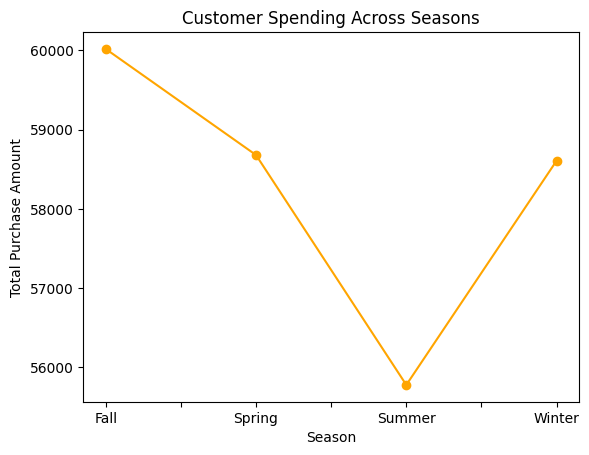

In [29]:
# Are there any specific seasons or months where customer spending is significantly higher
# Solution
df.groupby('Season')['Purchase Amount (USD)'].sum().plot(kind='line', marker='o', color='orange')
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount')
plt.title('Customer Spending Across Seasons')
plt.show()


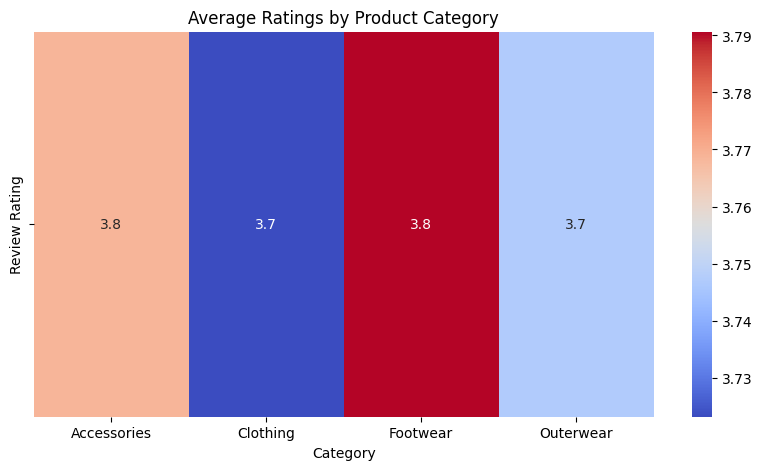

In [30]:
# What is the average rating given by customers for each product category
# Solution
plt.figure(figsize=(10,5))
sns.heatmap(df.groupby('Category')['Review Rating'].mean().to_frame().T, annot=True, cmap='coolwarm')
plt.title('Average Ratings by Product Category')
plt.show()



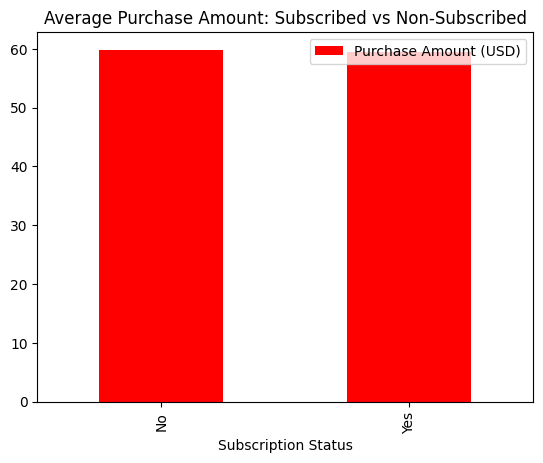

In [31]:
# Are there any notable differences in purchase behavior between subscribed and non-subscribed customers
# Solution
df.pivot_table(index='Subscription Status', values='Purchase Amount (USD)').plot(kind='bar', color=['red', 'blue'])
plt.title('Average Purchase Amount: Subscribed vs Non-Subscribed')
plt.show()


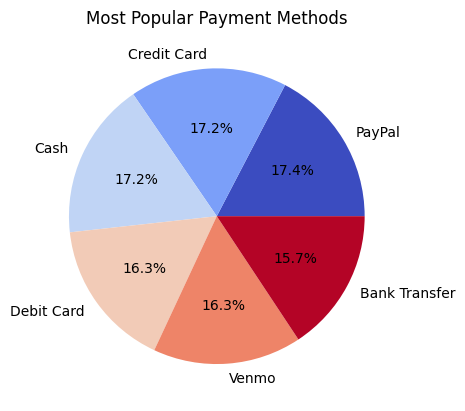

In [32]:
# Which payment method is the most popular among customers
# Solution
df['Payment Method'].value_counts().plot(kind='pie', autopct='%1.1f%%', colormap='coolwarm')
plt.ylabel('')
plt.title('Most Popular Payment Methods')
plt.show()


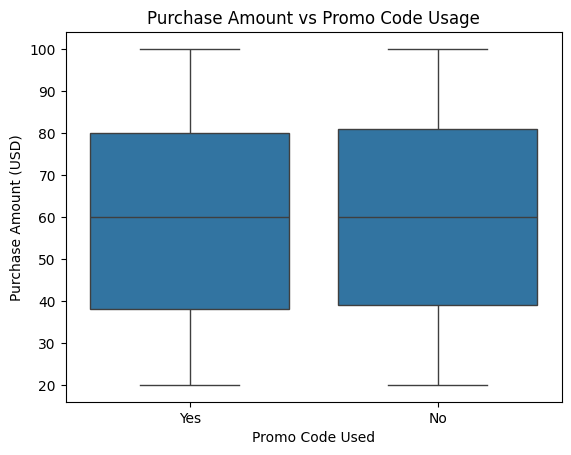

In [33]:
# Do customers who use promo codes tend to spend more than those who don't
# Solution
sns.boxplot(x='Promo Code Used', y='Purchase Amount (USD)', data=df)
plt.xlabel('Promo Code Used')
plt.ylabel('Purchase Amount (USD)')
plt.title('Purchase Amount vs Promo Code Usage')
plt.show()


/var/folders/rp/fgkp9sd511z36_nx00km26l40000gn/T/ipykernel_18411/4096070013.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age', y='Frequency of Purchases', data=df, ci=None)


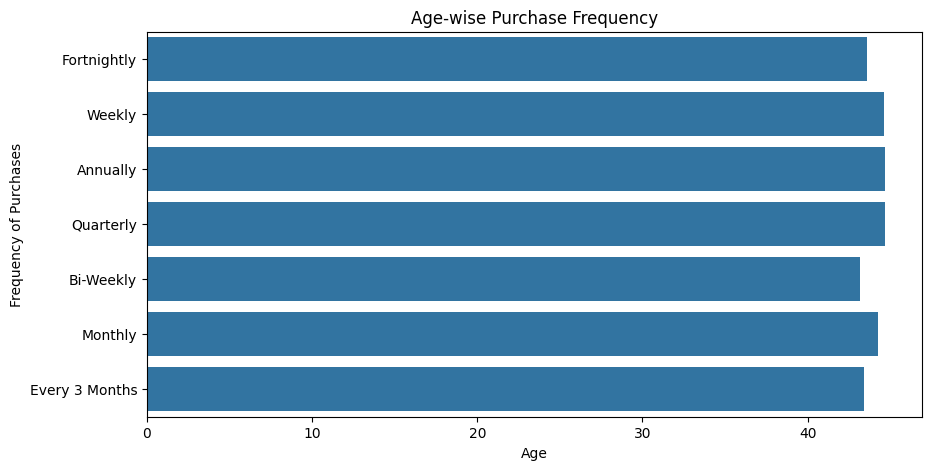

In [37]:
# How does the frequency of purchases vary across different age groups
# Solution
plt.figure(figsize=(10,5))
sns.barplot(x='Age', y='Frequency of Purchases', data=df, ci=None)
plt.title('Age-wise Purchase Frequency')
plt.show()





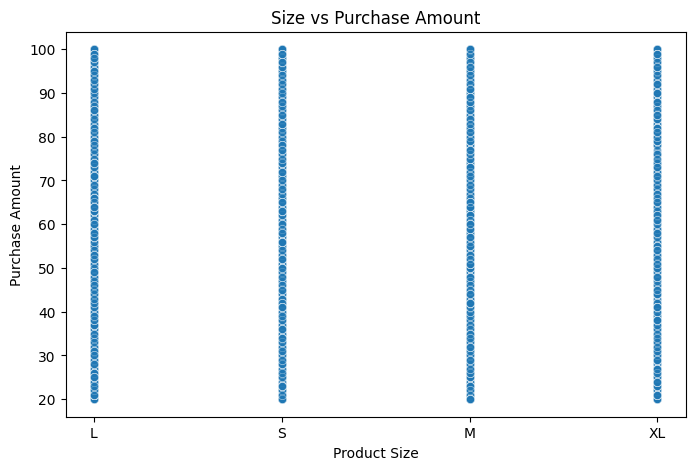

In [38]:
# Are there any correlations between the size of the product and the purchase amount
# Solution
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Size'], y=df['Purchase Amount (USD)'], alpha=0.6)
plt.xlabel('Product Size')
plt.ylabel('Purchase Amount')
plt.title('Size vs Purchase Amount')
plt.show()


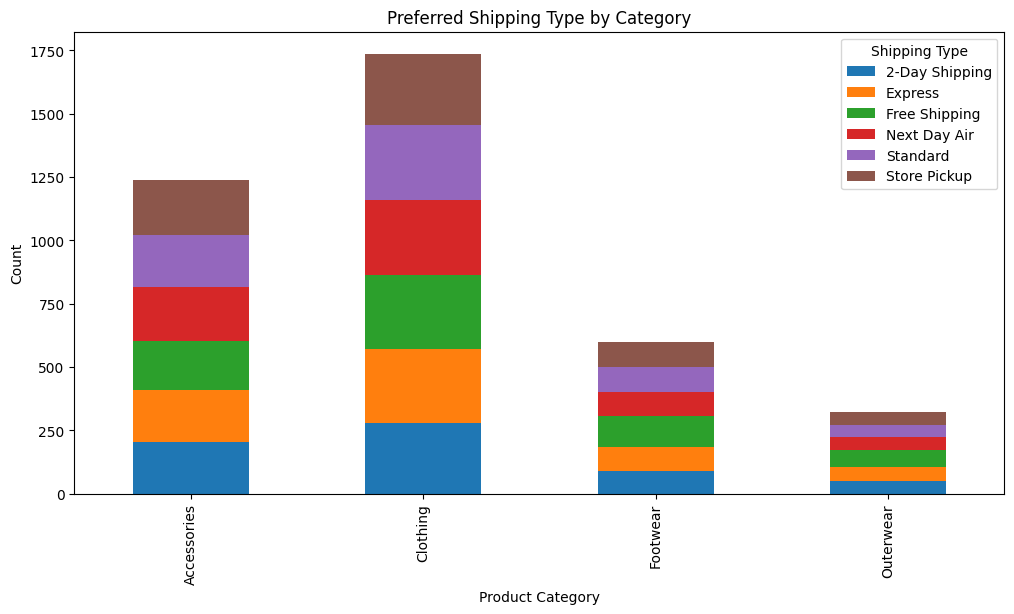

In [39]:
# Which shipping type is preferred by customers for different product categories
# Soution
df.groupby(['Category', 'Shipping Type']).size().unstack().plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Preferred Shipping Type by Category')
plt.legend(title='Shipping Type')
plt.show()


In [40]:
# How does the presence of a discount affect the purchase decision of customers
# Solution
df.pivot_table(index='Discount Applied', values='Purchase Amount (USD)', aggfunc=['count', 'mean'])


,count,mean
,Purchase Amount (USD),Purchase Amount (USD)
Discount Applied,,
No,2223,60.130454
Yes,1677,59.279070


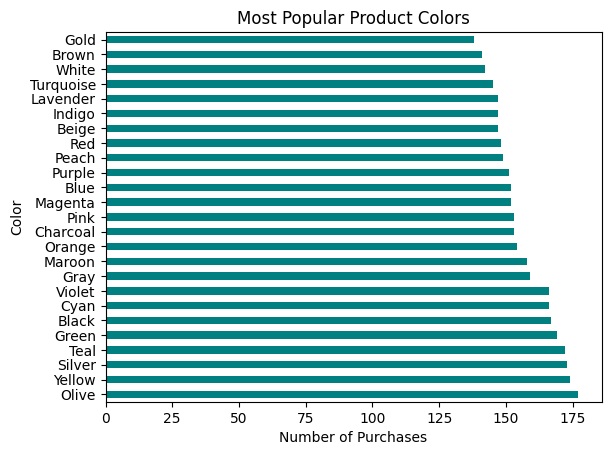

In [41]:
# Are there any specific colors that are more popular among customers
# Solution
df['Color'].value_counts().plot(kind='barh', color='teal')
plt.ylabel('Color')
plt.xlabel('Number of Purchases')
plt.title('Most Popular Product Colors')
plt.show()


In [42]:
# What is the average number of previous purchases made by customers
# Solution
df['Previous Purchases'].mean()


np.float64(25.35153846153846)

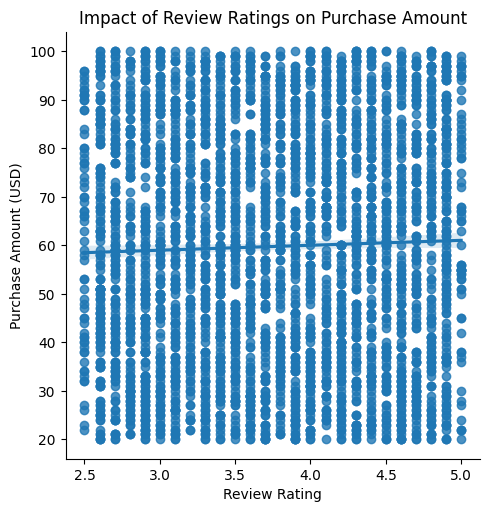

In [43]:
# How does the purchase amount differ based on the review ratings given by customers
# Solution

sns.lmplot(x='Review Rating', y='Purchase Amount (USD)', data=df)
plt.xlabel('Review Rating')
plt.ylabel('Purchase Amount (USD)')
plt.title('Impact of Review Ratings on Purchase Amount')
plt.show()


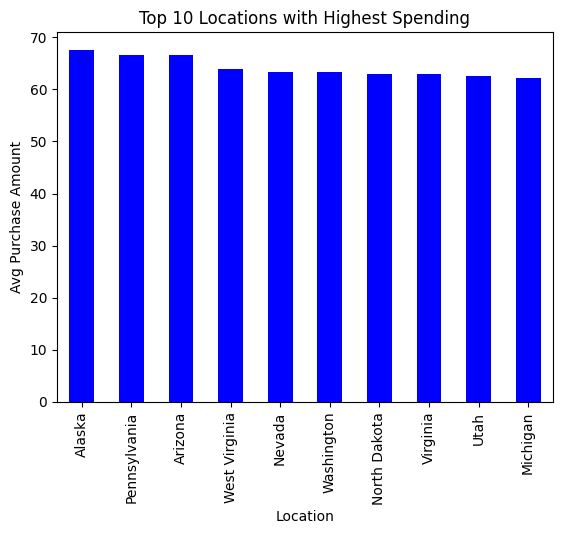

In [44]:
# Are there any noticeable differences in purchase behavior between different locations
# Solution
df.groupby('Location')['Purchase Amount (USD)'].mean().nlargest(10).plot(kind='bar', color='blue')
plt.xlabel('Location')
plt.ylabel('Avg Purchase Amount')
plt.title('Top 10 Locations with Highest Spending')
plt.show()


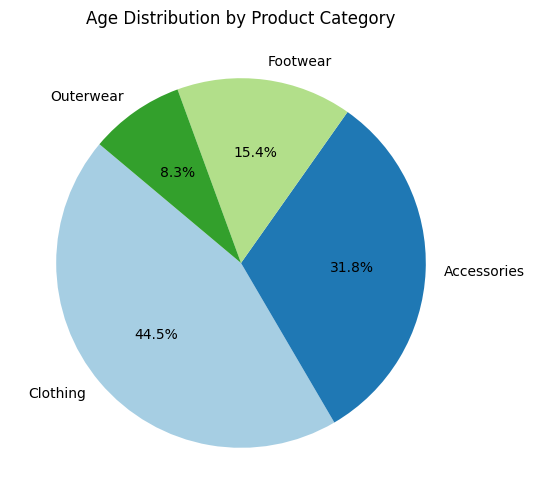

In [46]:
# Is there a relationship between customer age and the category of products they purchase
# Solution
category_counts = df['Category'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Age Distribution by Product Category')
plt.show()


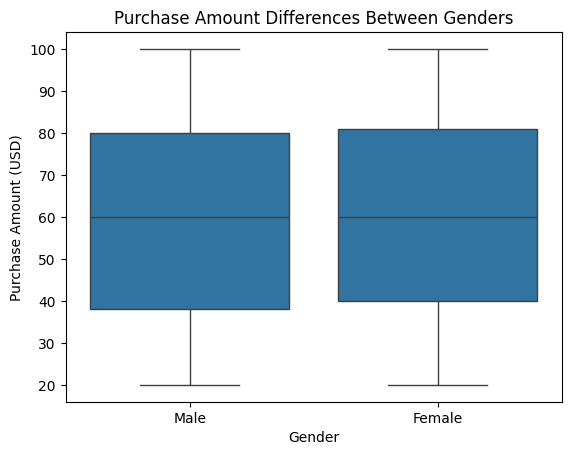

In [47]:
# How does the average purchase amount differ between male and female customers
# Solution
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df)
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.title('Purchase Amount Differences Between Genders')
plt.show()
